# Tunnel Modelling Program

## Introduction/Plan

### Project Breakdown
#### Base Program
* Collect Data on tunnel specifications and car breaking distances ----
* Create a Monte Carlo procedure for generating random car speeds through the tunnel around a given average speed limit ----
* Create a car class that holds the position, speed, length, and whether there is a car in front. ----
* Use the speeds generated to run cars through the tunnel using a for loop for each tick being 1 second, the movement of the cars is shown by the change in position variable.
* Determine the chance that another car will enter the tunnel per second.
* Count how many cars exit the tunnel per unit time (e.g. hours), then vary the speed limit and re run the test. Do this for speed limits varying from around 15km/h through to 120km/h (roughly 10 - 70 mph).
* From this, determine which speed limit allows for the mst cars to pass per hour.

#### Extensions
* Incorperate different vehicle classes into the mix to see if adding busses and bikes, etc, and determine if the ideal speed limit or the rate of traffic changes.
* Investigate the ideal number of toll booths that should be used with the new rate of cars travelling through the tunnel, given their average working time.
* Alter the rate of traffic through the unmanned/manned booths to accommodate those with fast tags.
* Use the final rate of traffic through the toll booths to determine the maximum revenue that will be collected by the booths.
* Extend to include both directions of travel through the tunnel.


Distances Between Cars (Leave 2 seconds. 4 seconds for heavy vehicle/bad weather. Add 1 second for each 1m of trailer length if towing)
https://www.qld.gov.au/transport/safety/rules/road/distances

Bus length, 14m (45ft)
Car length, 4.5m

Testing Speed Limits:
* 70 mph (31.29m/s)
* 60 mph (26.82m/s)
* 50 mph (22.35m/s)
* 40 mph (17.88m/s)
* 30 mph (13.41m/s)
* 20 mph (8.94m/s)
* 10 mph (4.47m/s)

[ 48.30053667  55.72755418  65.85365854  80.47690015 103.44827586
 144.77211796 241.07142857]


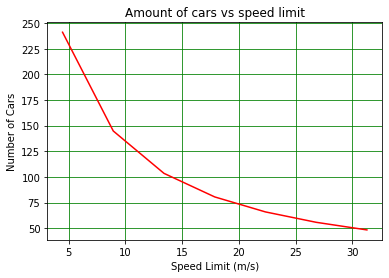

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Create an array to represent the 3.24km tunel
tunnel = np.zeros(3240)

tunnel_length = 3.24e3
speed_lim = np.array([31.29, 26.82, 22.35, 17.88, 13.41, 8.94, 4.47]) #m/s
spacing = speed_lim * 2
car_length = 4.5
bus_length = 14

length = spacing + car_length
amount = tunnel_length/length

print(amount)

plt.figure()
plt.title("Amount of cars vs speed limit")
plt.plot(speed_lim, amount, color = 'r', linestyle = '-')
plt.xlabel("Speed Limit (m/s)")
plt.ylabel("Number of Cars")
plt.grid(color = 'g')
plt.show()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
'''
Setting the base constants for the model
'''
tunnel_length = 3.24e3 #Length of tunnel (m)
new_car_chance = 0.8   #Probability of a new car entering the tunnel every second
#speed_limits = np.array([4.47, 8.94, 13.41, 17.88, 22.35, 26.82, 31.29]) #m/s
speed_limits = np.array([4.47, 8.94, 13.41, 17.88, 22.35, 26.82, 31.29]) #m/s
speed_limit = speed_limits[0]
avg_car = 4.5    #m
avg_bus = 14    #m
avg_truck = 15    #?????? m

In [5]:
class Car:
    '''
    Represents a vehicle in the tunnel.
    
    Parameters: 
    - Position: int, Distance past the tunnel entrance in m
    - Speed:    int, Speed of the car in m/s
    - Length:   int, The length of the vehicle in m
    - Front:    Boolean, True or False if the car is within the 2 seconds of the car in front
    - Complete: Boolean, True of False if the car is still in the tunnel, or past the end point
    
    Functions:
    - Check_Front:
        Checks if the car in front is within the 2 second braking window, based on speed limit.
    '''
    def __init__(self, position, speed, length, front, complete):
        self.position = 0 #Immediate position upon creation is 0
        self.speed = speed # Assumes the car is travelling at the speed limit upon entering the tunnel
        self.length = length
        self.front = False # assumes there are no cars immediately in front of any car entering the tunnel
        #self.complete = False
    # End of __init__
#

def change_speed(car):
    '''
    Randomly alters the speed of a car in the tunnel by a small amount
    '''
    rand_param = np.random.normal(0, 0.01, 1)
    new_speed = car.speed + (car.speed * rand_param)
    if (car.speed-speed_limit) < -2.5:
        new_speed = speed_limit - 1
    if (car.speed-speed_limit) > 2.5:
        new_speed = speed_limit + 1
    return new_speed
#
def create_car(speed, length):
    new = Car(0, speed, length, False, False) #Adds a new car to the list, with selected speed and length
    cars.insert(0, new)                   # (Assumes default potision and front and pass)
#
def get_length(avg):
    length = np.random.normal(avg, 1)
    return length
#
def check_front(p1, p2, l2, speed1, speed2):
        '''
        Function checks if there is a car withing the 2 second braking distance.
            - If there is, sets the boolean variable to True, and matches the speed with the car in front.
            - If there isn't, sets the boolean to False and slightly increases the speed of the vehicle.
            
        Parameters:
            - p1: int, Current vehicle position
            - p2: int, Next vehicle position
            - speed2: int, Next vehicle speed
        '''
        if ((p2-l2)-p1)<(speed_limit*2):
            front = True
            speed = speed1 - (speed_limit/10)
        else:
            front = False
            speed = speed1 + (speed_limit/10)    #increases the speed by 1 m/s
        return front, speed
        #
    # End of check_front
#

### Simulating traffic over an hour period (Failed)

In [10]:
cars = []    #initialising cars list
count = 0    #initialising a count variable

for i in range(3600):    #repeats for every second in an hour
    count =+ 1    #increments the count variable
    random = np.random.rand(1)    #generates a random number
    if random < new_car_chance:   #compares to the chance of a new car
        create_car(speed_limit, get_length(avg_car))    #generates a new car
    #
    if i > 0:
        for i in range(len(cars)):
            cars[i].position =+ cars[i].speed
            if cars[i].position > tunnel_length:
                cars.pop(len(cars)-1)
            cars[i].front, cars[i].speed = check_front(cars[i].position, cars[i+1].position, cars[i+1].speed)
                

TypeError: check_front() missing 2 required positional arguments: 'speed1' and 'speed2'

### Manually Testing the Runs

In [11]:
create_car(speed_limit, get_length(avg_car))
cars.pop(len(cars)-1)
for i in range(len(cars)):
    print(cars[i].length)

2.919948898269654
3.6860293569208578


In [12]:
print(len(cars))

2


In [13]:
cars.pop(len(cars)-1)
for i in range(len(cars)):
    print(cars[i].length)

2.919948898269654


In [14]:
cars = []
counter = 0
counts = []
car_count = 0
create_car(speed_limit, get_length(avg_car))    #Generates an Initial Car

In [15]:
counter = counter + 1    #increments the count variable

#
if len(cars) > 0:
    for i in range(len(cars)):    #all cars
        cars[i].position = cars[i].position + cars[i].speed  #Changes Position
        cars[i].speed = change_speed(cars[i])    #Changes Speed Randomly
#

if len(cars) > 1:
    for i in range(len(cars)-1):
            cars[i].front, cars[i].speed = check_front(cars[i].position, cars[i+1].position, cars[i+1].length, cars[i].speed, cars[i+1].speed)
    if cars[len(cars)-1].position > tunnel_length:
        cars.pop(len(cars)-1)
        car_count = car_count + 1
    #
#

random = np.random.rand(1)    #generates a random number
if random < new_car_chance:   #compares to the chance of a new car
    create_car(speed_limit, get_length(avg_car))    #generates a new car
#
if counter >= 60:
    counts.append(car_count)
    car_count = 0
    counter = 0
print(len(cars))
print("Counter = ", counter)
print("Car Count = ", car_count)
print("Counts", counts)
for i in range(len(cars)-1):
    print(cars[i+1].position-cars[i].position)
print("")
for i in range(len(cars)):
    print(cars[i].position, cars[i].speed, cars[i].front)    

2
Counter =  1
Car Count =  0
Counts []
4.47

0 4.47 False
4.47 [4.44870533] False


In [16]:
for i in range(len(cars)-1):
    print(cars[i+1].position-cars[i].position)

4.47


### Distribution Testing

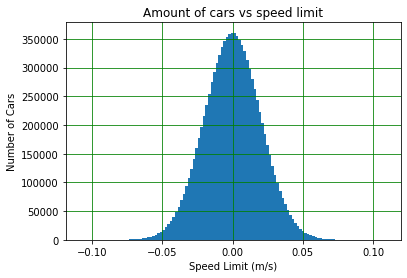

In [17]:
yData = np.random.normal(0, 0.02, 10000000)

plt.figure()
plt.title("Amount of cars vs speed limit")
plt.hist(yData, 120)
plt.xlabel("Speed Limit (m/s)")
plt.ylabel("Number of Cars")
plt.grid(color = 'g')
plt.show()

NameError: name 'xDataplt' is not defined

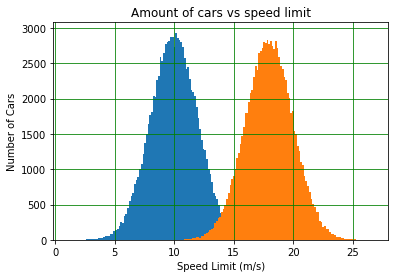

In [21]:
dat_morning = np.random.normal(10, 2, 100000)
dat_afternoon = np.random.normal(18, 2, 100000)

plt.figure()
plt.title("Amount of cars vs speed limit")
plt.hist(dat_morning, 120)
plt.hist(dat_afternoon, 120)
plt.xlabel("Speed Limit (m/s)")
plt.ylabel("Number of Cars")
plt.grid(color = 'g')
xDataplt.show()

Data From: https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0049171.g004


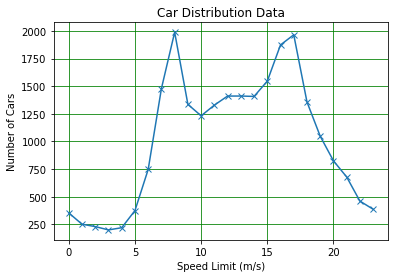

Total =  24104.85714285714
Scale Factor =  1.0174238
Scaled Total =  24524.855352742856



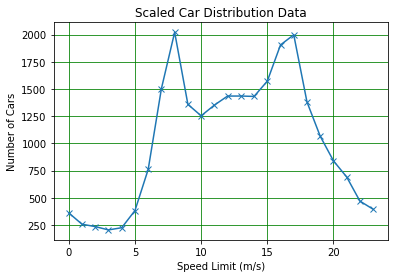

Probabilities of new car every second based on Distribution Data:
[0.09992555 0.07105817 0.06500208 0.05652354 0.0621759  0.10598165
 0.21115581 0.41787049 0.56172291 0.37737541 0.34814466 0.37547783
 0.39861211 0.39869286 0.39768351 0.43672513 0.52942374 0.55514195
 0.3834315  0.29594113 0.23315962 0.19177631 0.13012527 0.10933268]

86400


In [6]:
xData = np.linspace(0,23, 24)
days = np.array([350, 250, 230, 200, 220, 375, 750, 1475, 1975, 1312, 1208, 1300, 1385, 1385, 1350, 1480, 1800, 1875, 1260, 980, 775, 650, 440, 375])
friday = np.array([375, 260, 230, 200, 220, 375, 730, 1500, 2063, 1475, 1375, 1500, 1563, 1565, 1750, 1937, 2313, 2500, 1937, 1450, 1125, 850, 583, 458])
yData = ((6*days) + friday)/7

print("Data From: https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0049171.g004")
plt.figure()
plt.title("Car Distribution Data")
plt.plot(xData, yData, linestyle='-', marker ='x')
plt.xlabel("Speed Limit (m/s)")
plt.ylabel("Number of Cars")
plt.grid(color = 'g')
plt.show()


print("Total = ", sum(yData))
scale = 1.0174238  #25425 / Total Cars in Distribution
print("Scale Factor = ", scale)
print("Scaled Total = ", sum(yData)*scale)
print("")

plt.figure()
plt.title("Scaled Car Distribution Data")
plt.plot(xData, yData*scale, linestyle='-', marker ='x')
plt.xlabel("Speed Limit (m/s)")
plt.ylabel("Number of Cars")
plt.grid(color = 'g')
plt.show()

print("Probabilities of new car every second based on Distribution Data:")
print((yData*scale)/3600)
print("")
hours = yData*scale/3600
seconds = []
for i in range(len(hours)-1):
    temp=(np.linspace(hours[i], hours[i+1], 3600))
    seconds = np.append(seconds, temp)
seconds = np.append(seconds, np.linspace(hours[23], hours[0], 3600))
print(len(seconds))

### First Attempt at for-looping code and running for a day (WORKED!!):

In [169]:
import sys
cars = []
counter = 0
counts = []
car_count = 0
create_car(speed_limit, get_length(avg_car))    #Generates an Initial Car

seconds = seconds/seconds.sum()

for inc in range(len(seconds)):
    
    new_car_chance = seconds[inc]
    counter = counter + 1    #increments the count variable
    #
    if len(cars) > 0:
        for i in range(len(cars)):    #all cars
            cars[i].position = cars[i].position + cars[i].speed  #Changes Position
            cars[i].speed = change_speed(cars[i])    #Changes Speed Randomly
        #
    #
    if len(cars) > 1:
        for i in range(len(cars)-1):
            cars[i].front, cars[i].speed = check_front(cars[i].position, cars[i+1].position, cars[i+1].length, cars[i].speed, cars[i+1].speed)
        #
        if cars[len(cars)-1].position > tunnel_length:
            cars.pop(len(cars)-1)
            car_count = car_count + 1
        
        no_crashes = True
        i = 0
        
        while no_crashes:

            if (cars[i+1].position-cars[i].position) < cars[i+1].length:
                print("Simulation Halted!")
                print("There was a crash, please retry or consult Tom")
                no_crashes = False
            i += 1
                #for i in range(len(cars)-1):
                #   pass
                #print(cars[i+1].position-cars[i+1].length-cahere:rs[i].position)
                #exit()
    #
    
    random = np.random.rand(1)/len(seconds)    #generates a random number
    if random < new_car_chance:   #compares to the chance of a new car
        create_car(speed_limit, get_length(avg_car))    #generates a new car
    #
    if counter >= 60:
        counts.append(car_count)
        car_count = 0
        counter = 0
    #
#
print("Simulation Completed!")
print("counts = ", counts)
print("Sum = ", sum(counts))
print("Length = ", len(counts))

IndexError: list index out of range

ValueError: x and y must have same first dimension, but have shapes (1440,) and (0,)

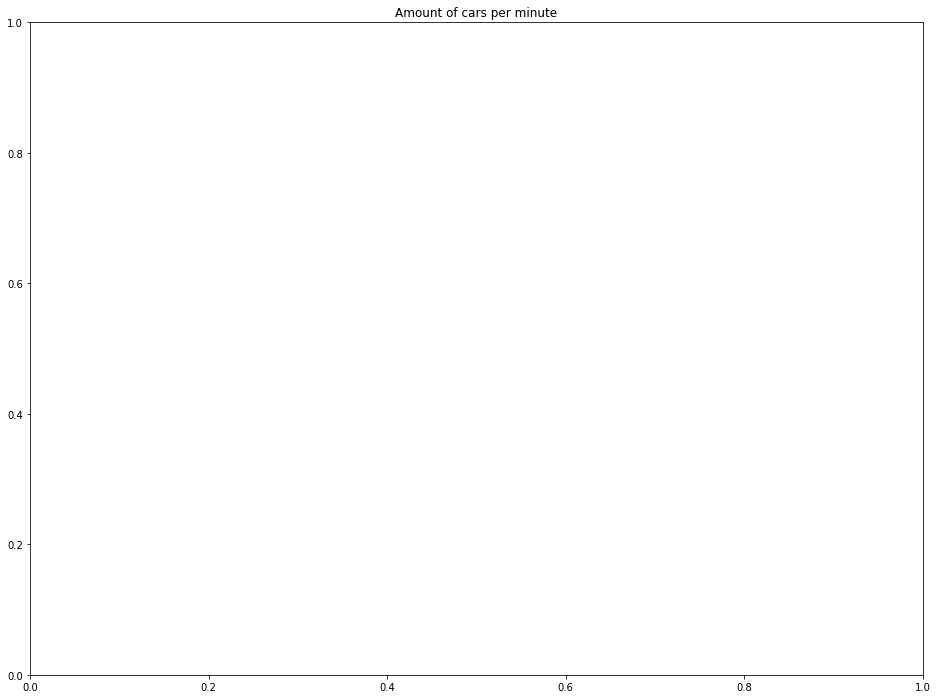

In [21]:
from scipy.interpolate import UnivariateSpline

plt.figure(figsize=(16, 12))
plt.title("Amount of cars per minute")
plt.plot(np.linspace(0, 1440, 1440), counts, linestyle='', marker ='x')
plt.xlabel("Minute of Day")
plt.ylabel("Number of Cars")
plt.xticks([0,60,120,180,240,300,360,420,480,540,600,660,720,780,840,900,960,1020,1080,1140,1200,1260,1320,1380,1440])
plt.grid(color = 'g')

s = UnivariateSpline(np.linspace(0,1440,1440), counts, s=13500)
xs = np.linspace(0, 1440, 1440)
ys = s(xs)
plt.plot(xs, ys)
plt.show()

In [ ]:
import sys
count_list = []
for attempt in range(5):
    cars = []
    counter = 0
    counts = []
    car_count = 0
    create_car(speed_limit, get_length(avg_car))    #Generates an Initial Car
    for inc in range(len(seconds)):
        new_car_chance = seconds[inc]
        counter = counter + 1    #increments the count variable
        #
        if len(cars) > 0:
            for i in range(len(cars)):    #all cars
                cars[i].position = cars[i].position + cars[i].speed  #Changes Position
                cars[i].speed = change_speed(cars[i])    #Changes Speed Randomly
            #
        #
        if len(cars) > 1:
            for i in range(len(cars)-1):
                    cars[i].front, cars[i].speed = check_front(cars[i].position, cars[i+1].position, cars[i+1].length, cars[i].speed, cars[i+1].speed)
            #
            if cars[len(cars)-1].position > tunnel_length:
                cars.pop(len(cars)-1)
                car_count = car_count + 1
            #
            for i in range(len(cars)-1):
                if ((cars[i+1].position-cars[i+1].length)-cars[i].position)<0:
                    print("Simulation Halted!")
                    print("There was a crash, please retry or consult Tom")
                    for i in range(len(cars)-1):
                        print(cars[i+1].position-cars[i].position)
                    exit()
        #
        
        random = np.random.rand(1)    #generates a random number
        if random < new_car_chance:   #compares to the chance of a new car
            create_car(speed_limit, get_length(avg_car))    #generates a new car
        #
        if counter >= 60:
            counts.append(car_count)
            car_count = 0
            counter = 0
        #
    #
    count_list.append(counts)
print("Simulation Completed!")

Simulation Halted!
There was a crash, please retry or consult Tom
[18.74378134]
[10.99908576]
[20.91481105]
[60.83749828]
[13.25055828]
[23.53738271]
[24.48895916]
[16.29418212]
[25.59513947]
[21.2613866]
[5.01541689]
[17.4994648]
[-1.237747]
[8.8232313]
Simulation Halted!
There was a crash, please retry or consult Tom
[17.92476336]
[10.92163103]
[21.62975259]
[60.24627686]
[12.76792852]
[23.53738271]
[24.91987328]
[17.15730456]
[24.87929177]
[20.23940433]
[5.19651828]
[17.04558661]
[-3.4151768]
[9.83739489]
Simulation Halted!
There was a crash, please retry or consult Tom
[18.78157803]
[10.85898583]
[20.83558313]
[61.28152268]
[12.1385021]
[23.48080046]
[25.43101391]
[16.29692678]
[25.92048227]
[18.3637409]
[6.18016177]
[15.75886653]
[-4.77077613]
[10.47045811]
Simulation Halted!
There was a crash, please retry or consult Tom
[19.59616853]
[10.7174887]
[20.02427859]
[62.39430083]
[11.42733878]
[23.40420273]
[26.0374723]
[15.36321599]
[26.98884373]
[15.59787065]
[8.08434098]
[13.510727

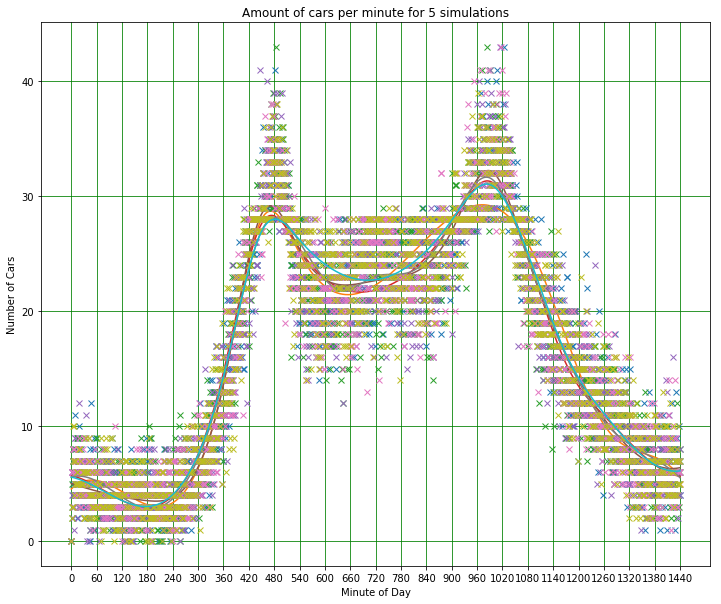

..................................................


In [117]:
from scipy.interpolate import UnivariateSpline

xData = np.linspace(0,1440,1440)

plt.figure(figsize=(12, 10))
plt.title("Amount of cars per minute for 5 simulations")
plt.xlabel("Minute of Day")
plt.ylabel("Number of Cars")

s = []
xs = []
ys = []
for i in range(len(count_list)):
    plt.plot(xData, count_list[i], linestyle='', marker = 'x')
    s.append(UnivariateSpline(xData, count_list[i], s=13500))
    xs.append(xData)
    ys.append(s[i](xs[i]))
    plt.plot(xs[i], ys[i])

plt.xticks([0,60,120,180,240,300,360,420,480,540,600,660,720,780,840,900,960,1020,1080,1140,1200,1260,1320,1380,1440])
plt.grid(color = 'g')

plt.show()


In [6]:
import os
import sys
count_list = []
for speeds in range(len(speed_limits)):
    speed_limit = speed_limits[speeds]
    print("Processing speed limit", (speeds+1), "of", len(speed_limits))
    for attempt in range(5):
        cars = []
        counter = 0
        counts = []
        car_count = 0
        create_car(speed_limit, get_length(avg_car))    #Generates an Initial Car
        print((attempt*20), "%")
        for inc in range(len(seconds)):
            new_car_chance = seconds[inc]
            counter = counter + 1    #increments the count variable
            #
            if len(cars) > 0:
                for i in range(len(cars)):    #all cars
                    cars[i].position = cars[i].position + cars[i].speed  #Changes Position
                    cars[i].speed = change_speed(cars[i])    #Changes Speed Randomly
                #
            #
            if len(cars) > 1:
                for i in range(len(cars)-1):
                        cars[i].front, cars[i].speed = check_front(cars[i].position, cars[i+1].position, cars[i+1].length, cars[i].speed, cars[i+1].speed)
                #
                if cars[len(cars)-1].position > tunnel_length:
                    cars.pop(len(cars)-1)
                    car_count = car_count + 1
                #
#                for i in range(len(cars)-1):
#                    if ((cars[i+1].position-cars[i+1].length)-cars[i].position)<0:
#                        print("Simulation Halted!")
#                        print("There was a crash, please retry or consult Tom")
#                        for i in range(len(cars)-1):
#                            print(cars[i+1].position-cars[i+1].length-cars[i].position)
#                        os.startfile('failed.mp3')
#                        sys.exit()
            #
            
            random = np.random.rand(1)    #generates a random number
            if random < new_car_chance:   #compares to the chance of a new car
                create_car(speed_limit, get_length(avg_car))    #generates a new car
            #
            if counter >= 60:
                counts.append(car_count)
                car_count = 0
                counter = 0
            #
        #
        count_list.append(counts)
    #
#
print("Simulation Completed!")

Processing speed limit 1 of 7
0 %
20 %
40 %
60 %
80 %
Processing speed limit 2 of 7
0 %
20 %
40 %
60 %
80 %
Processing speed limit 3 of 7
0 %
20 %
40 %
60 %
80 %
Processing speed limit 4 of 7
0 %
20 %
40 %
60 %
80 %
Processing speed limit 5 of 7
0 %
20 %
40 %
60 %
80 %
Processing speed limit 6 of 7
0 %
20 %
40 %
60 %
80 %
Processing speed limit 7 of 7
0 %
20 %
40 %
60 %
80 %
Simulation Completed!


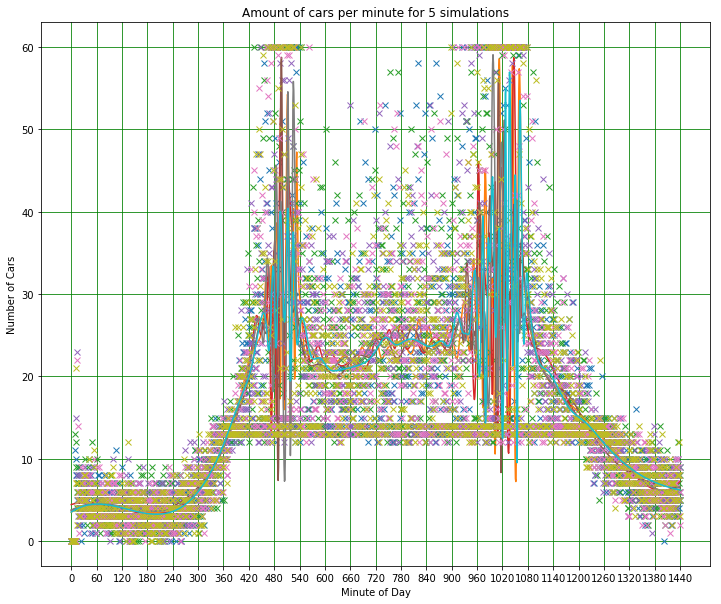

In [7]:
from scipy.interpolate import UnivariateSpline

xData = np.linspace(0,1440,1440)

plt.figure(figsize=(12, 10))
plt.title("Amount of cars per minute for 5 simulations")
plt.xlabel("Minute of Day")
plt.ylabel("Number of Cars")

s = []
xs = []
ys = []
for i in range(len(count_list)-30):
    plt.plot(xData, count_list[i], linestyle='', marker = 'x')
    s.append(UnivariateSpline(xData, count_list[i], s=100000))
    xs.append(xData)
    ys.append(s[i](xs[i]))
    plt.plot(xs[i], ys[i])

plt.xticks([0,60,120,180,240,300,360,420,480,540,600,660,720,780,840,900,960,1020,1080,1140,1200,1260,1320,1380,1440])
plt.grid(color = 'g')

plt.show()

In [8]:
#splitting the array
mph10 = []
mph20 = []
mph30 = []
mph40 = []
mph50 = []
mph60 = []
mph70 = []

for i in range(len(count_list)):
    if i < 5:
        mph10.append(count_list[i])
    elif i < 10:
        mph20.append(count_list[i])
    elif i < 15:
        mph30.append(count_list[i])
    elif i < 20:
        mph40.append(count_list[i])
    elif i < 25:
        mph50.append(count_list[i])
    elif i < 30:
        mph60.append(count_list[i])
    elif i < 35:
        mph70.append(count_list[i])
print(len(mph10), len(mph60))
mph10avg, mph20avg, mph30avg, mph40avg, mph50avg, mph60avg, mph70avg = [],[],[],[],[],[],[]
for i in range(len(mph10[0])):
    mph10avg.append(mph10[0][i]+mph10[1][i]+mph10[2][i]+mph10[3][i]+mph10[4][i])
    mph20avg.append(mph20[0][i]+mph20[1][i]+mph20[2][i]+mph20[3][i]+mph20[4][i])
    mph30avg.append(mph30[0][i]+mph30[1][i]+mph30[2][i]+mph30[3][i]+mph30[4][i])
    mph40avg.append(mph40[0][i]+mph40[1][i]+mph40[2][i]+mph40[3][i]+mph40[4][i])
    mph50avg.append(mph50[0][i]+mph50[1][i]+mph50[2][i]+mph50[3][i]+mph50[4][i])
    mph60avg.append(mph60[0][i]+mph60[1][i]+mph60[2][i]+mph60[3][i]+mph60[4][i])
    mph70avg.append(mph70[0][i]+mph70[1][i]+mph70[2][i]+mph70[3][i]+mph70[4][i])
#
print(len(mph10avg))
mph10avg, mph20avg, mph30avg, mph40avg, mph50avg, mph60avg, mph70avg = np.array(mph10avg), np.array(mph20avg), np.array(mph30avg), np.array(mph40avg), np.array(mph50avg), np.array(mph60avg), np.array(mph70avg)
mph10avg, mph20avg, mph30avg, mph40avg, mph50avg, mph60avg, mph70avg = mph10avg/5, mph20avg/5, mph30avg/5, mph40avg/5, mph50avg/5, mph60avg/5, mph70avg/5
print(mph10avg)

5 5
1440
[0.  0.  0.  ... 6.6 5.2 6.4]


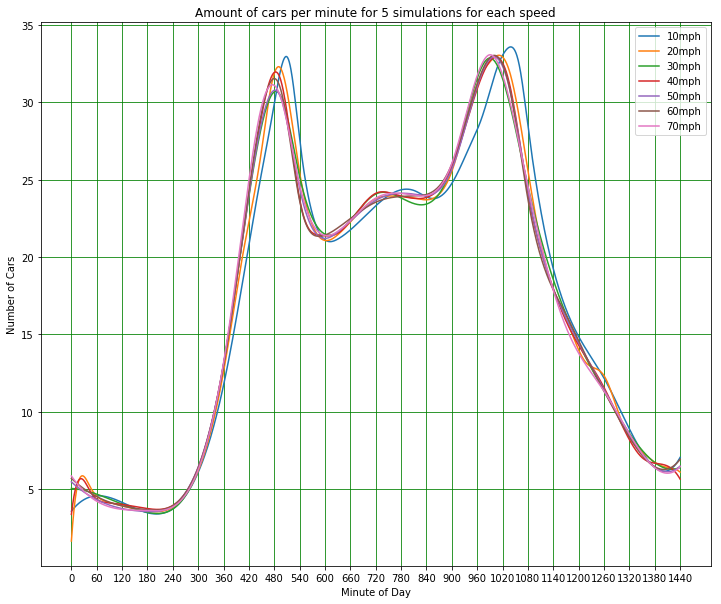

In [12]:
from scipy.interpolate import UnivariateSpline
plot_data = False
xData = np.linspace(0,1440,1440)

plt.figure(figsize=(12, 10))
plt.title("Amount of cars per minute for 5 simulations for each speed")
plt.xlabel("Minute of Day")
plt.ylabel("Number of Cars")

if plot_data:
    plt.plot(xData, mph10avg, linestyle='', marker = 'x')
s=(UnivariateSpline(xData, mph10avg, s=27500))
xs=(xData)
ys=(s(xs))
plt.plot(xs, ys, label="10mph")

if plot_data:
    plt.plot(xData, mph20avg, linestyle='', marker = 'x')
s=(UnivariateSpline(xData, mph20avg, s=1900))
xs=(xData)
ys=(s(xs))
plt.plot(xs, ys, label="20mph")

if plot_data:
    plt.plot(xData, mph30avg, linestyle='', marker = 'x')
s=(UnivariateSpline(xData, mph30avg, s=2400))
xs=(xData)
ys=(s(xs))
plt.plot(xs, ys, label="30mph")

if plot_data:
    plt.plot(xData, mph40avg, linestyle='', marker = 'x')
s=(UnivariateSpline(xData, mph40avg, s=2400))
xs=(xData)
ys=(s(xs))
plt.plot(xs, ys, label="40mph")

if plot_data:
    plt.plot(xData, mph50avg, linestyle='', marker = 'x')
s=(UnivariateSpline(xData, mph50avg, s=2500))
xs=(xData)
ys=(s(xs))
plt.plot(xs, ys, label="50mph")

if plot_data:
    plt.plot(xData, mph60avg, linestyle='', marker = 'x')
s=(UnivariateSpline(xData, mph60avg, s=2500))
xs=(xData)
ys=(s(xs))
plt.plot(xs, ys, label="60mph")

if plot_data:
    plt.plot(xData, mph70avg, linestyle='', marker = 'x')
s=(UnivariateSpline(xData, mph70avg, s=2500))
xs=(xData)
ys=(s(xs))
plt.plot(xs, ys, label="70mph")

plt.xticks([0,60,120,180,240,300,360,420,480,540,600,660,720,780,840,900,960,1020,1080,1140,1200,1260,1320,1380,1440])
plt.grid(color = 'g')
plt.legend()
plt.savefig('7 Speeds - 5 Runs')
plt.show()